In [1]:
import pandas as pd
import numpy as np
import cv2
import os

# Training Data

In [2]:
train_dir = os.path.join(os.getcwd(),r'data\train') 
test_dir = os.path.join(os.getcwd(),r'data\test') 
categories = ['benign','malignant']
y_train = []
x_train = []
x_test = []
y_test = []
Batch_Size = 32
INIT_LR = 1e-4
EPOCHES = 10

In [3]:
for category in categories:
    path = os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(224,224))
        image = image / 255
        x_train.append(image)
        y_train.append(category)

In [4]:
for category in categories:
    path = os.path.join(test_dir,category)
    for img in os.listdir(path):
        img_path = os.path.join(path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(224,224))
        image = image / 255
        x_test.append(image)
        y_test.append(category)

In [5]:
from sklearn.preprocessing import LabelBinarizer
from keras.utils import to_categorical
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_train = to_categorical(y_train,num_classes=2)
y_test = lb.fit_transform(y_test)
y_test = to_categorical(y_test,num_classes=2)

In [6]:
x_train = np.array(x_train,dtype='float32')
y_train = np.array(y_train,dtype='float32')
x_test = np.array(x_test,dtype='float32')
y_test = np.array(y_test,dtype='float32')

In [7]:
from keras.layers import Dense,Flatten,MaxPool2D,Dropout,Conv2D,InputLayer
from keras.models import Sequential
model = Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(32,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(2,2),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(2,activation='softmax'))

In [8]:
from keras.optimizers import Adam
#Regularization
opt = Adam(learning_rate=INIT_LR,weight_decay=INIT_LR/Batch_Size)

In [9]:
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
History = model.fit(
    x_train,
    y_train,
    epochs=EPOCHES,
    steps_per_epoch=len(x_train)//Batch_Size,
    batch_size=Batch_Size,
    validation_steps=.2
)

Epoch 1/10
82/82 [==============================] - 34s 410ms/step - loss: 0.6558 - accuracy: 0.6014
Epoch 2/10
82/82 [==============================] - 34s 411ms/step - loss: 0.5098 - accuracy: 0.7516
Epoch 3/10
82/82 [==============================] - 34s 409ms/step - loss: 0.4531 - accuracy: 0.7812
Epoch 4/10
82/82 [==============================] - 34s 410ms/step - loss: 0.4187 - accuracy: 0.7973
Epoch 5/10
82/82 [==============================] - 34s 412ms/step - loss: 0.4124 - accuracy: 0.7977
Epoch 6/10
82/82 [==============================] - 34s 413ms/step - loss: 0.4132 - accuracy: 0.7992
Epoch 7/10
82/82 [==============================] - 35s 421ms/step - loss: 0.4158 - accuracy: 0.8046
Epoch 8/10
82/82 [==============================] - 34s 412ms/step - loss: 0.3962 - accuracy: 0.8058
Epoch 9/10
82/82 [==============================] - 34s 416ms/step - loss: 0.3984 - accuracy: 0.8077
Epoch 10/10
82/82 [==============================] - 34s 412ms/step - loss: 0.3698 - accura

In [13]:
pred_result = model.predict(x_test,batch_size=Batch_Size)
pred_result = np.argmax(pred_result,axis=1)

21/21 [==============================] - 2s 86ms/step


In [14]:
from sklearn.metrics import classification_report
print(f"Classifiation Report:\n {classification_report(y_test.argmax(axis=1),pred_result,target_names=lb.classes_)}")

Classifiation Report:
               precision    recall  f1-score   support

      benign       0.95      0.69      0.80       360
   malignant       0.72      0.96      0.82       300

    accuracy                           0.81       660
   macro avg       0.84      0.82      0.81       660
weighted avg       0.85      0.81      0.81       660



## Saving The model

In [15]:
model.save('model.h5')

c:\Users\mo3az\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Visualize The Training Process

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

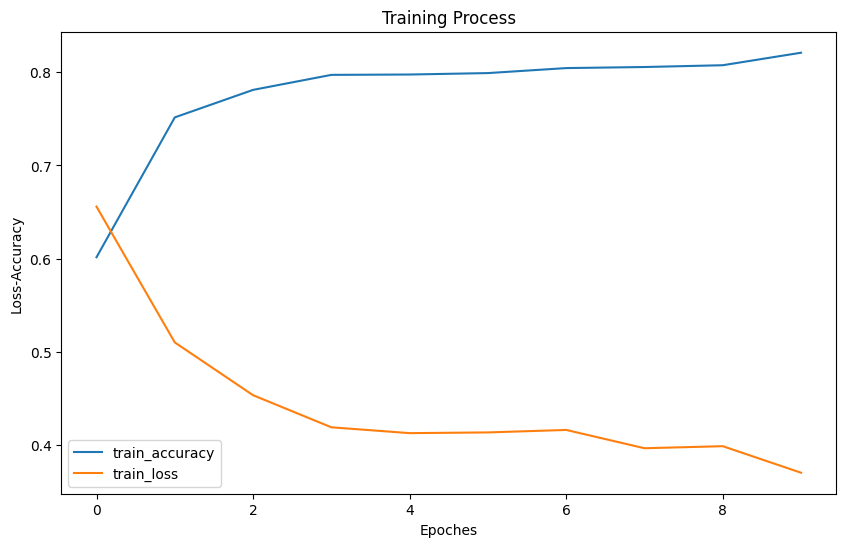

In [22]:
plt.figure(figsize=(10,6))
plt.plot(np.arange(0,10),History.history['accuracy'],label='train_accuracy')
plt.plot(np.arange(0,10),History.history['loss'],label='train_loss')
plt.xlabel('Epoches')
plt.ylabel('Loss-Accuracy')
plt.title('Training Process')
plt.legend(loc='lower left')
plt.show()

## Plotting Some Random Sample With Prediction

In [48]:
sample_dir = r"F:\Work\AI\Skin Cancer Classification DL\Random Sample"
prediction = []
class_index = []
for img in os.listdir(sample_dir):
    image_path = os.path.join(sample_dir,img)
    image_sample = cv2.imread(image_path)
    img_array = cv2.resize(image_sample,(224,224))
    img_array = img_array / 255.0
    img_array = np.array([img_array],dtype='float32')
    pred = model.predict(img_array)
    prediction.append(pred)
    class_index.append(pred.argmax(axis=1))

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 22ms/step


In [58]:
class_type=lb.classes_[class_index]
class_type

array([['benign'],
       ['benign'],
       ['malignant'],
       ['malignant'],
       ['malignant'],
       ['malignant'],
       ['malignant'],
       ['malignant'],
       ['malignant'],
       ['malignant'],
       ['malignant'],
       ['malignant'],
       ['benign'],
       ['benign'],
       ['benign']], dtype='<U9')

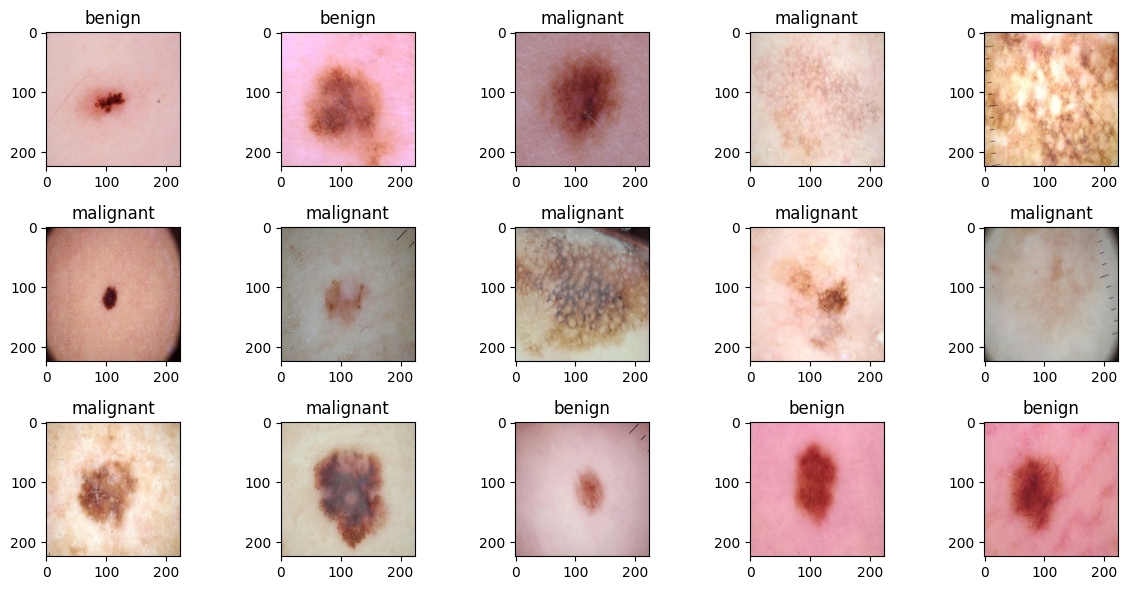

In [61]:
from keras.preprocessing.image import load_img
plt.figure(figsize=(12,6))
for i,img in enumerate(os.listdir(sample_dir)):
    img_path = os.path.join(sample_dir,img)
    image = load_img(img_path,target_size=(224,224))
    plt.subplot(3,5,i+1)
    plt.imshow(image)
    plt.title(*class_type[i])
plt.tight_layout()
plt.show()